In [1]:
# This notebook is based upon: https://medium.com/@jameschen_78678/predict-gender-with-voice-and-speech-data-347f437fc4da
# I slightly modified the code and commented it as much as possible to understand it
# Also, I added tensorFlow NN

In [2]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

my_data = pd.read_csv('voice.csv')

In [3]:
my_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
print(my_data.columns.values)
my_data.shape

['meanfreq' 'sd' 'median' 'Q25' 'Q75' 'IQR' 'skew' 'kurt' 'sp.ent' 'sfm'
 'mode' 'centroid' 'meanfun' 'minfun' 'maxfun' 'meandom' 'mindom' 'maxdom'
 'dfrange' 'modindx' 'label']


(3168, 21)

In [5]:
#Plot the histograms
male = my_data.loc[my_data['label']=='male']
female = my_data.loc[my_data['label']=='female']

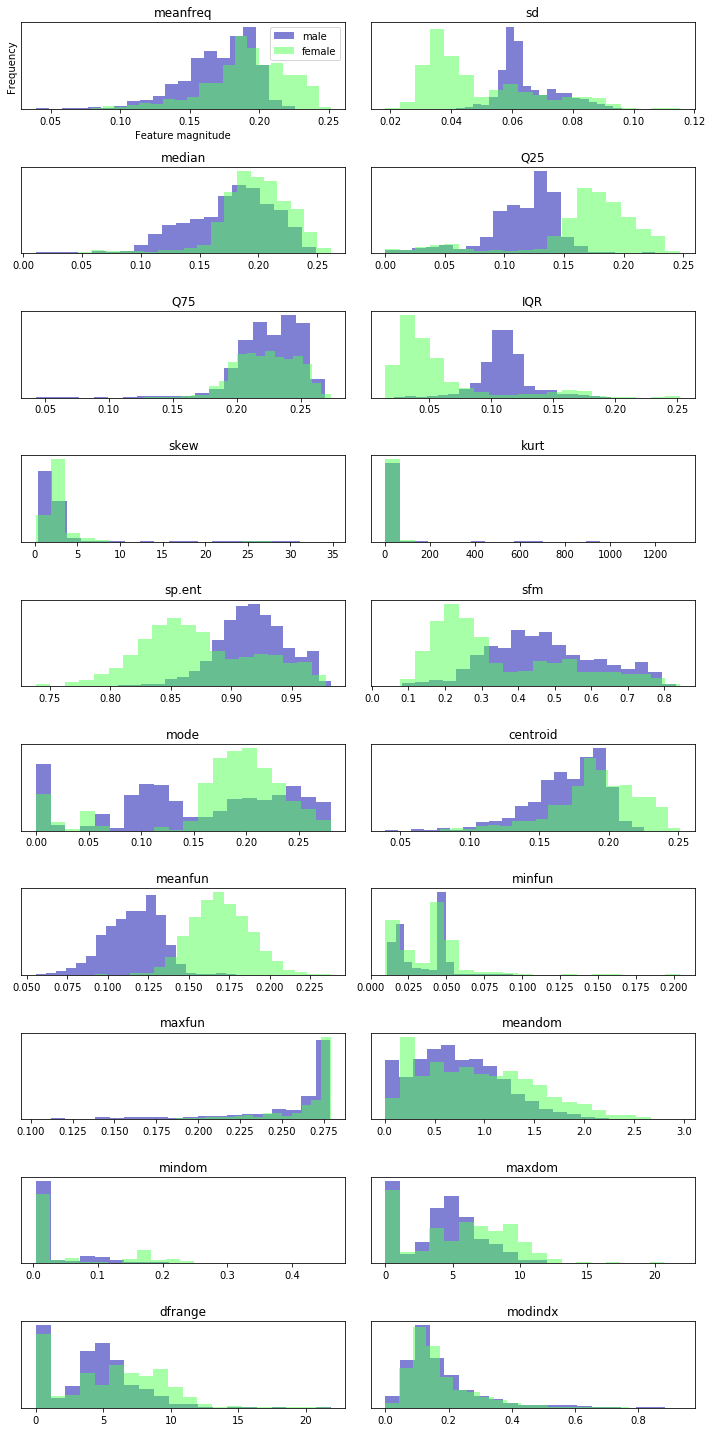

In [6]:
# creating figure and axes objects
fig, axes = plt.subplots(10, 2, figsize=(10,20))
# flattening of the axes (changing two dimensional arrays to one dimensional)
ax = axes.ravel()

# for each of twenty subplots do as follows:
for i in range(20):
    # create a histogram where (a) all data for one column for "male" will be, there will be 20 bins and some colour
    # Why is mglearn used? (c) alpha is responsible for differences between particular points on x axis
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    # analogous for female
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    # set title to corresponding label
    ax[i].set_title(list(male)[i])
    # suppresses y-ticks
    ax[i].set_yticks(())
    
# add labels to the first subplot
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["male", "female"], loc="best")
fig.tight_layout()

In [7]:
# changing 'male' and 'female' to numeric values (0 and 1)
my_data.loc[my_data.label == 'male', 'label'] = 0
my_data.loc[my_data.label == 'female', 'label'] = 1

In [8]:
my_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [9]:
# Create two datasets - train and test. random_state can be omitted (numpy random state generator is used)
# test_size sets the size of test set (0.0 to 1.0)
my_data_train, my_data_test = train_test_split(my_data, random_state=0, test_size=.2)

# StandardScaler object is used to standardie data.
scaler = StandardScaler()
# StandardScaler.fit(data) only computes std and mean for scaling later; it is not the operation itself
scaler.fit(my_data_train.iloc[:,0:20])
# create training & test dataset of variables and scale them. iloc is inclusive of first index and exclusive of last 
# (same as range())
X_train = scaler.transform(my_data_train.iloc[:,0:20])
X_test = scaler.transform(my_data_test.iloc[:,0:20])

In [10]:
# create train and test arrays
# y_train = list(my_data_train['label'].values)
# y_test = list(my_data_test['label'].values)
y_train = pd.DataFrame(data=my_data_train['label'].values)
y_test = pd.DataFrame(data=my_data_test['label'].values)

In [11]:
# In the code below, following ML algorithms are implemented:
# DecisionTree, RandomForest, GradientBoosting, SVM, NN
# All of them are written in one line of code:
# object = ClassifierClass(options),fit(X_train, y_train)
# And then the results are printed using object.score(X_test, y_test)

In [12]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.961


In [13]:
#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
print("Random Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Random Forests
Accuracy on training set: 0.998
Accuracy on test set: 0.976


/home/santiagonasar/anaconda3/envs/tensorEnv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [14]:
#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("Gradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

/home/santiagonasar/anaconda3/envs/tensorEnv/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting
Accuracy on training set: 0.996
Accuracy on test set: 0.975


In [15]:
#Train support vector machine model
svm = SVC().fit(X_train, y_train)
print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Support Vector Machine
Accuracy on training set: 0.985
Accuracy on test set: 0.984


/home/santiagonasar/anaconda3/envs/tensorEnv/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
print("Multilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

/home/santiagonasar/anaconda3/envs/tensorEnv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multilayer Perceptron
Accuracy on training set: 0.996
Accuracy on test set: 0.983


/home/santiagonasar/anaconda3/envs/tensorEnv/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
# importing tensorflow
# Creating tensorflow keras model
import tensorflow as tf
from tensorflow.keras import layers

In [18]:
model = tf.keras.Sequential([
    # first layer takes in 10 dimensions and outputs 32 
    layers.Dense(32, input_shape=(20,)),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('softmax'),
])
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
# configuring the model
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model, iterating on the data in batches of 32 samples
# Generate dummy data
# import numpy as np
# data = np.random.random((1000, 100))
# labels = np.random.randint(2, size=(1000, 1))

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
2534/2534 [==============================] - 0s 42us/step - loss: 0.0835 - acc: 0.9846
Epoch 2/10
2534/2534 [==============================] - 0s 36us/step - loss: 0.0828 - acc: 0.9842
Epoch 3/10
2534/2534 [==============================] - 0s 39us/step - loss: 0.0812 - acc: 0.9846
Epoch 4/10
2534/2534 [==============================] - 0s 39us/step - loss: 0.0804 - acc: 0.9846
Epoch 5/10
2534/2534 [==============================] - 0s 49us/step - loss: 0.0794 - acc: 0.9846
Epoch 6/10
2534/2534 [==============================] - 0s 46us/step - loss: 0.0788 - acc: 0.9838
Epoch 7/10
2534/2534 [==============================] - 0s 39us/step - loss: 0.0778 - acc: 0.9850
Epoch 8/10
2534/2534 [==============================] - 0s 34us/step - loss: 0.0768 - acc: 0.9850
Epoch 9/10
2534/2534 [==============================] - 0s 36us/step - loss: 0.0761 - acc: 0.9846
Epoch 10/10
2534/2534 [==============================] - 0s 32us/step - loss: 0.0756 - acc: 0.9850


In [30]:
score = model.evaluate(X_test, y_test, batch_size=32)

634/634 [==============================] - 0s 20us/step


In [33]:
print("Tensor Flow NN")
print(model.evaluate(X_test, y_test, batch_size=32))
# print("Accuracy on training set: {:.3f}".format(model.evaluate(X_test, y_test, batch_size=32)))
# print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Tensor Flow NN
634/634 [==============================] - 0s 20us/step
[0.07284252110527893, 0.9810725553930746]
634/634 [==============================] - 0s 20us/step


TypeError: unsupported format string passed to list.__format__

In [23]:
#Plot the variable importance
def plot_feature_importances_mydata(model):
    # how many features
    n_features = X_train.shape[1]
    #create bars for each feature
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # add labels (ticks  "modindex, dfrange, ...")
    plt.yticks(np.arange(n_features), list(my_data))
    # add variable importance labels
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")

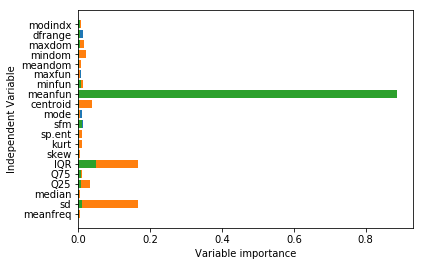

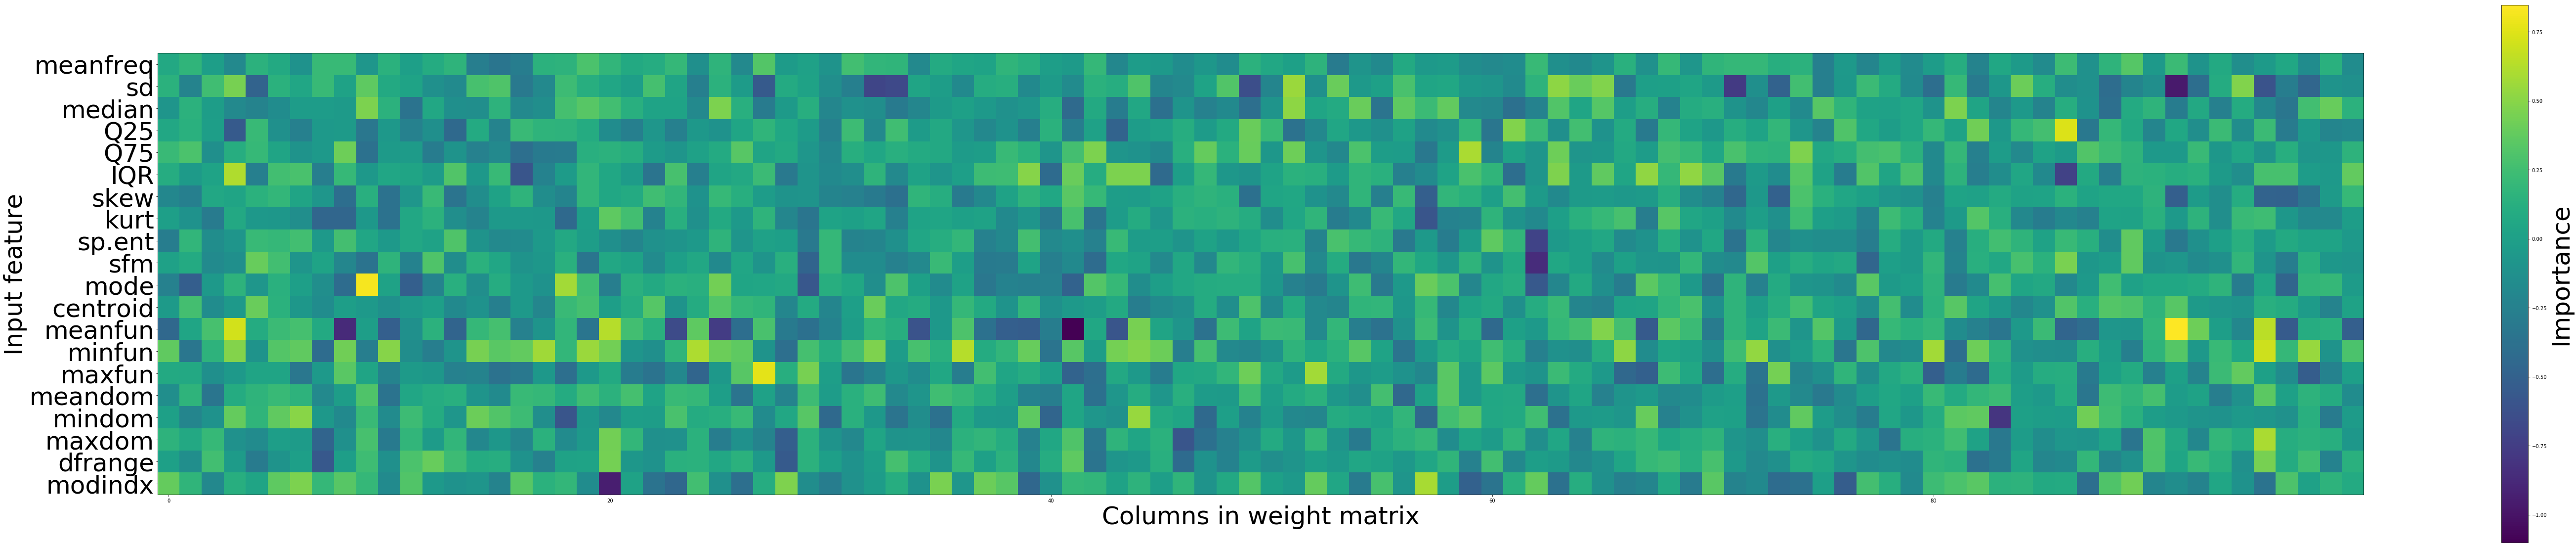

In [24]:
# run the function for each of the classifier objects
plot_feature_importances_mydata(tree)
plot_feature_importances_mydata(forest)
plot_feature_importances_mydata(gbrt)

#Plot the heatmap on first layer weights for neural network
plt.figure(figsize=(100, 20))

# imshow is function creating a heatmap; coefs_ is a list of weight matrices,
# where weight matrix at index represents the weights between layer i and i+1
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(20), list(my_data),fontsize = 50)
plt.xlabel("Columns in weight matrix", fontsize = 50)
plt.ylabel("Input feature", fontsize = 50)
plt.colorbar().set_label('Importance',size=50)
    
plt.show()